In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
dataset=pd.read_csv('stc_reviews.csv')
dataset.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,c1165a53-de67-4e98-b5ce-a887bfa06c0a,Ataullah Ibrar hussain,https://play-lh.googleusercontent.com/a/AAcHTt...,Not good sarvice don't take stc sim i hate thi...,1,0,NaN,2023-05-25 16:10:14,Hi ✋\nWe are at your service around the clock ...,2023-05-26 06:21:48,NaN
1,6f47be56-a091-4c4e-a250-411d58999df6,Jasim Uddin,https://play-lh.googleusercontent.com/a/AAcHTt...,Jasim Uddin 90908090,1,0,4.36.0,2023-05-25 12:59:18,NaN,NaN,4.36.0
2,0c7fbe3a-cca8-493b-892e-a9252fe9dc04,md liton,https://play-lh.googleusercontent.com/a-/AD_cM...,best apps,5,0,4.35.0,2023-05-25 08:33:48,Hello ✋\nWe are pleased with your experience a...,2023-05-26 06:15:45,4.35.0
3,bfb20d33-a112-4b6e-818c-0986a815c750,ak moose (AK45CC),https://play-lh.googleusercontent.com/a-/AD_cM...,I overpaid my bill. When trying to refund open...,1,0,4.37.0,2023-05-25 08:18:13,Hi ✋\nWe are at your service around the clock ...,2023-05-26 06:21:08,4.37.0
4,a2b24738-dc21-4023-aa9b-90acc3b6987c,Qamar Abajober,https://play-lh.googleusercontent.com/a/AAcHTt...,Good,3,0,4.36.0,2023-05-24 22:17:37,Hello ✋\nWe are pleased with your experience a...,2023-05-26 06:15:28,4.36.0


In [3]:
#removing unnecessary columns 
dataset = dataset.drop(['reviewId','userName','userImage','score','thumbsUpCount','reviewCreatedVersion','replyContent','repliedAt'],axis=1)
dataset


,content,at,appVersion
0,Not good sarvice don't take stc sim i hate thi...,2023-05-25 16:10:14,NaN
1,Jasim Uddin 90908090,2023-05-25 12:59:18,4.36.0
2,best apps,2023-05-25 08:33:48,4.35.0
3,I overpaid my bill. When trying to refund open...,2023-05-25 08:18:13,4.37.0
4,Good,2023-05-24 22:17:37,4.36.0
...,...,...,...
20112,"ممتاز , اخيرا",2012-10-22 05:12:56,NaN
20113,Well done app,2012-10-22 05:00:17,NaN
20114,تطبيق رائع,2012-10-22 03:30:11,NaN
20115,"Nice graphics, good functions.",2012-10-22 01:47:04,1.0


In [5]:
# filtring the data to be english only
import nltk

import re

nltk.download('words')  # Download the words corpus

words = set(nltk.corpus.words.words())




# Function to filter out rows with numbers, whitespace, and symbols
def filter_rows(row):
    if isinstance(row['content'], str):  # Check if the content is a string
        sentence = row['content']
        if re.match(r'^[a-zA-Z\s]+$', sentence):  # Check if the sentence contains only letters and whitespace
            return True
    return False

# Apply the row filtering to the DataFrame
dff = dataset[dataset.apply(filter_rows, axis=1)]

# Display only the 'content' column
dff = dff[['content','at','appVersion']]
dff


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


,content,at,appVersion
2,best apps,2023-05-25 08:33:48,4.35.0
4,Good,2023-05-24 22:17:37,4.36.0
6,Fairly precise app,2023-05-24 21:54:00,4.37.0
7,good apps,2023-05-24 18:19:38,4.35.0
8,Not cool,2023-05-24 15:33:52,NaN
...,...,...,...
20091,great app,2012-10-27 11:52:31,1.0
20105,Good,2012-10-23 00:15:43,NaN
20109,Cool app,2012-10-22 06:28:03,NaN
20113,Well done app,2012-10-22 05:00:17,NaN


In [7]:
#Checking for null values
dff.isnull().sum()

content          0
at               0
appVersion    2119
dtype: int64

In [6]:
dff.head(500)

,content,at,appVersion
2,best apps,2023-05-25 08:33:48,4.35.0
4,Good,2023-05-24 22:17:37,4.36.0
6,Fairly precise app,2023-05-24 21:54:00,4.37.0
7,good apps,2023-05-24 18:19:38,4.35.0
8,Not cool,2023-05-24 15:33:52,NaN
...,...,...,...
1061,It is a good App,2022-07-14 20:17:39,4.25.1
1063,Nice,2022-07-14 06:59:38,4.23.0
1068,Good,2022-07-13 04:43:26,NaN
1070,Very good,2022-07-13 00:18:08,4.23.0


In [8]:
!pip install textstat
!pip install nltk


In [9]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from textstat import flesch_reading_ease

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [10]:
sid = SentimentIntensityAnalyzer()
words = set(nltk.corpus.words.words())


In [11]:
positive_scores = []
negative_scores = []
neutral_scores = []
compound_scores = []


    


In [12]:
for index, row in dff.iterrows():
    contents = row['content']
    
    sentiment_scores = sid.polarity_scores(contents)
    
    positive_score = sentiment_scores['pos']
    negative_score = sentiment_scores['neg']
    neutral_score = sentiment_scores['neu']
    compound_score = sentiment_scores['compound']
    
    positive_scores.append(positive_score * 100)
    negative_scores.append(negative_score * 100)
    neutral_scores.append(neutral_score * 100)
    compound_scores.append(compound_score * 100)

In [13]:
dff['POSITIVE SCORE'] = positive_scores
dff['NEGATIVE SCORE'] = negative_scores
dff['NEUTRAL SCORE'] = neutral_scores
dff['COMPOUND SCORE'] = compound_scores


dff

,content,at,appVersion,POSITIVE SCORE,NEGATIVE SCORE,NEUTRAL SCORE,COMPOUND SCORE
2,best apps,2023-05-25 08:33:48,4.35.0,80.8,0.0,19.2,63.69
4,Good,2023-05-24 22:17:37,4.36.0,100.0,0.0,0.0,44.04
6,Fairly precise app,2023-05-24 21:54:00,4.37.0,0.0,0.0,100.0,0.00
7,good apps,2023-05-24 18:19:38,4.35.0,74.4,0.0,25.6,44.04
8,Not cool,2023-05-24 15:33:52,NaN,0.0,66.2,33.8,-24.11
...,...,...,...,...,...,...,...
20091,great app,2012-10-27 11:52:31,1.0,80.4,0.0,19.6,62.49
20105,Good,2012-10-23 00:15:43,NaN,100.0,0.0,0.0,44.04
20109,Cool app,2012-10-22 06:28:03,NaN,69.7,0.0,30.3,31.82
20113,Well done app,2012-10-22 05:00:17,NaN,51.2,0.0,48.8,27.32


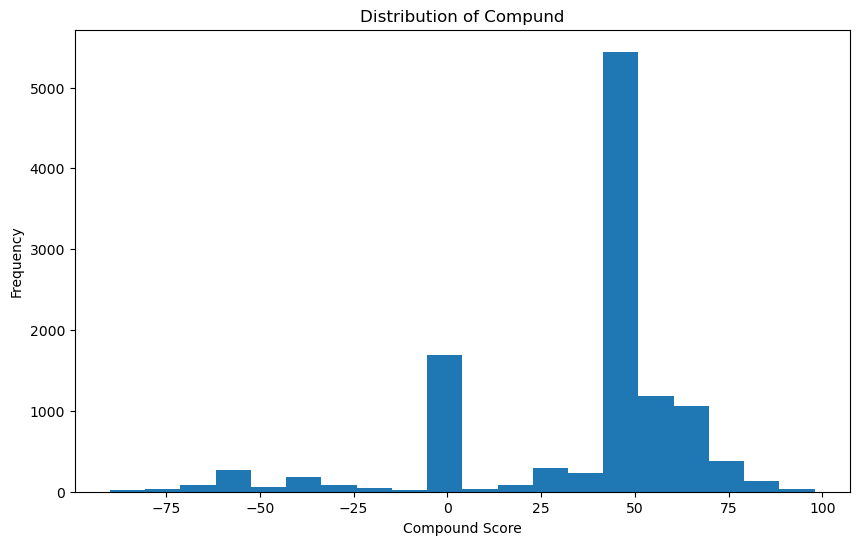

In [14]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(dff['COMPOUND SCORE'], bins=20)
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.title('Distribution of Compund')
plt.show()

In [15]:
positive_threshold = 0.2
negative_threshold = -0.2

dff['Sentiment']= ''

for index, row in dff.iterrows():
    compound_score = row['COMPOUND SCORE']
    
    if compound_score > positive_threshold:
        dff.at[index, 'Sentiment'] = 'Positive'
    elif compound_score < negative_threshold:
            dff.at[index, 'Sentiment'] = 'Negative'
    else:
                dff.at[index, 'Sentiment'] = 'Neutral'

In [16]:
dff.head(100)

,content,at,appVersion,POSITIVE SCORE,NEGATIVE SCORE,NEUTRAL SCORE,COMPOUND SCORE,Sentiment
2,best apps,2023-05-25 08:33:48,4.35.0,80.8,0.0,19.2,63.69,Positive
4,Good,2023-05-24 22:17:37,4.36.0,100.0,0.0,0.0,44.04,Positive
6,Fairly precise app,2023-05-24 21:54:00,4.37.0,0.0,0.0,100.0,0.00,Neutral
7,good apps,2023-05-24 18:19:38,4.35.0,74.4,0.0,25.6,44.04,Positive
8,Not cool,2023-05-24 15:33:52,NaN,0.0,66.2,33.8,-24.11,Negative
...,...,...,...,...,...,...,...,...
181,good,2023-04-19 07:45:50,4.33.0,100.0,0.0,0.0,44.04,Positive
183,Nice,2023-04-19 05:48:12,4.34.0,100.0,0.0,0.0,42.15,Positive
185,Nowadays very bad network for stc users,2023-04-18 18:13:53,4.35.0,0.0,38.7,61.3,-58.49,Negative
186,Buy the esim last the list option payment then...,2023-04-18 13:38:55,4.35.0,23.8,10.5,65.6,66.64,Positive


In [17]:
dff['Sentiment'].value_counts()

Positive    8864
Neutral     1684
Negative     797
Name: Sentiment, dtype: int64

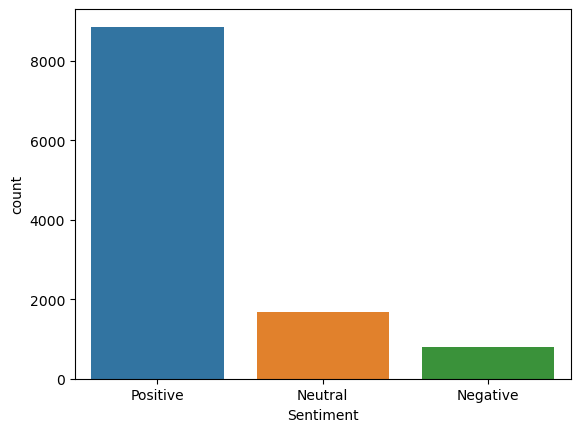

In [18]:
import seaborn as sns

sns.countplot(data=dff,x='Sentiment')
plt.show()

In [19]:
dff.to_csv('SentimentSTC.csv', index=False)
